In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Exploration of New York City Taxi Data

### Data Information
 + id - a unique identifier for each trip
 + vendor_id - a code indicating the provider associated with the trip record
 + pickup_datetime - date and time when the meter was engaged
 + dropoff_datetime - date and time when the meter was disengaged
 + passenger_count - the number of passengers in the vehicle (driver entered value)
 + pickup_longitude - the longitude where the meter was engaged
 + pickup_latitude - the latitude where the meter was engaged
 + dropoff_longitude - the longitude where the meter was disengaged
 + dropoff_latitude - the latitude where the meter was disengaged
 + store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
 + trip_duration - duration of the trip in seconds

In [2]:
# load data file
train=pd.read_csv(r"C:\Users\이준호\Desktop\Kaggle\taxi\train.csv",header=0)
test=pd.read_csv(r"C:\Users\이준호\Desktop\Kaggle\taxi\train.csv",header=0)

In [3]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train.shape

(1458644, 11)

### 1. Check dtypes

#### (1) Interger columns

Since `trip_duration` is target variable, we'll consier `passenger_count`, `vendor_id` columns only.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

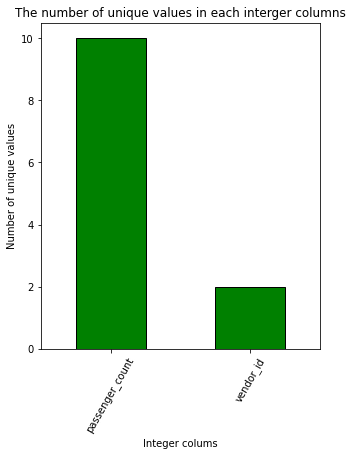

In [5]:
train[['vendor_id','passenger_count']].nunique().sort_index().plot.bar(color='green',figsize=(5,6),edgecolor='k')
plt.title('The number of unique values in each interger columns')
plt.xlabel('Integer colums');plt.ylabel('Number of unique values');plt.xticks(rotation=60)

This graph below shows number of passengers in vehicles ranges from 0 to 9, and there are comparatively large number of vehicles which carried 1 paasenger.

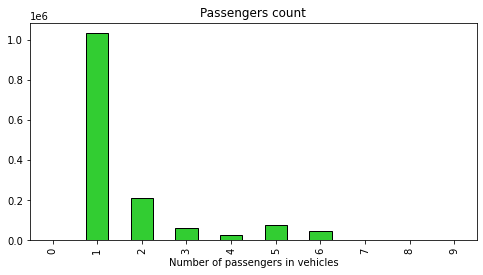

In [6]:
train['passenger_count'].value_counts().sort_index().plot.bar(color='limegreen',figsize=(8,4),edgecolor='k')
plt.title('Passengers count')
plt.xlabel('Number of passengers in vehicles');

Text(0.5, 1.0, 'Vendor Id')

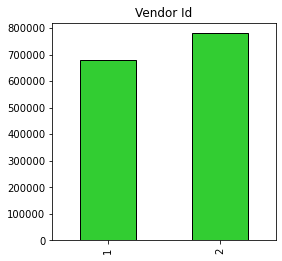

In [7]:
train['vendor_id'].value_counts().sort_index().plot.bar(color='limegreen',figsize=(4,4),edgecolor='k')
plt.title('Vendor Id')

#### (2) Float columns

Columns related to 'location' have float types

In [8]:
train.select_dtypes('float').head(3)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087


#### (3) Object columns

`pickup_datetime` and `dropoff_datetime` are date columns but their dytpes are object, so we need to change.

In [9]:
train.select_dtypes('object').head(3)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,N
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,N
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,N


**Change dyptes of** `pickup_datetime` & `dropoff_datetime`

In [10]:
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
train['dropoff_datetime']=pd.to_datetime(train['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

**Check** `store_and_fwd_flag`

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

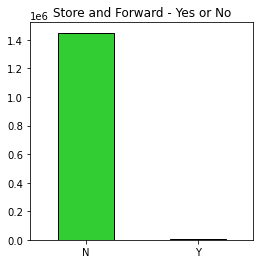

In [11]:
train['store_and_fwd_flag'].value_counts().sort_index().plot.bar(color='limegreen',figsize=(4,4),edgecolor='k')
plt.title('Store and Forward - Yes or No')
plt.xticks(rotation=0)

### 2. Distribution of Target

Text(0.5, 1.0, 'Distribution of Target variable(trip_duration)')

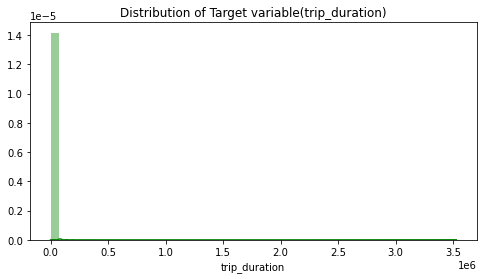

In [12]:
plt.figure(figsize=(8,4))
sns.distplot(train['trip_duration'],hist=True,color='green')
plt.title('Distribution of Target variable(trip_duration)')

### 3. Missing variables

There is no missing variable in this data.

In [13]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### 4. EDA

#### (1) Preprocessing

In [14]:
import calendar

In [15]:
train['pickup_date']=train['pickup_datetime'].dt.date
train['pickup_hour']=train['pickup_datetime'].apply(lambda x: x.hour)
train['pickup_day_week']=train['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
    
train['dropoff_date']=train['dropoff_datetime'].dt.date
train['dropoff_hour']=train['dropoff_datetime'].apply(lambda x: x.hour)
train['dropoff_day_week']=train['dropoff_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [16]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_week,dropoff_date,dropoff_hour,dropoff_day_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,2016-03-14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,2016-06-12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,2016-01-19,12,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,2016-04-06,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,2016-03-26,13,Saturday


In [17]:
print('The earliest pickup date: ',min(train['pickup_date']))
print('The latest pickup date: ',max(train['pickup_date']))
print('\n')
print('The earliest dropoff date: ',min(train['dropoff_date']))
print('The latest dropoff date: ',max(train['dropoff_date']))

The earliest pickup date:  2016-01-01
The latest pickup date:  2016-06-30


The earliest dropoff date:  2016-01-01
The latest dropoff date:  2016-07-01


Change `trip_duration` to hour measure.

In [18]:
train['trip_duration_in_hour']=train['trip_duration'].apply(lambda x: x/3600)

Use **Hiversine distance** to calculate distance between pickup and dropoff. <br>
<https://en.wikipedia.org/wiki/Haversine_formula>

In [19]:
from math import radians,cos,sin,asin,sqrt

In [20]:
def get_distance(df):
    lon1=radians(df['pickup_longitude'])
    lon2=radians(df['dropoff_longitude'])
    lat1=radians(df['pickup_latitude'])
    lat2=radians(df['dropoff_latitude'])
    dlon=lon1-lon2
    dlat=lat1-lat2
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c= 2*asin(sqrt(a))
    r= 6373 # radius of earth
    return c*r

In [ ]:
train['trip_distance']=train.apply(lambda df: get_distance(df),axis=1)
train.head()

#### (2) Map pickup and dropoff locations

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

**Pickup Heatmap**

In [ ]:
pickup=train.groupby(['pickup_latitude','pickup_longitude'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})

In [ ]:
center=[40.730610,-73.935242] # New york location
m=folium.Map(location=center,zoom_start=10,tiles='cartodbpositron')
HeatMap(pickup,opacity=0.2,max_zoom=1,blur=10,radius=5).add_to(m)
m

**Dropoff Heatmap**

In [ ]:
dropoff=train.groupby(['dropoff_latitude','dropoff_longitude'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})

In [ ]:
m2=folium.Map(location=center,zoom_start=10,tiles='cartodbpositron')
HeatMap(dropoff,opacity=0.2,max_zoom=1,blur=10,radius=5).add_to(m2)
m2